# 2.3 Complex machine learning models - sklearn - random forests
### The following script contains the following:

#### 1. Import data libraries, additional requirements
#### 2. File directory, read the data
#### 3. Look at features from 2000-2010
#### 4. Load and split data in training/test sets
#### 5. Create random forest classifier
#### 6. Conduct feature importances analysis
        
---------------------------------------------------------------------------------------------------------------------------
## 1. Import data libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all columns
pd.set_option('display.max_columns', None)

---------------------------------------------------------------------------------------------------------------------------
## 2. File directory, read the data

In [ ]:
path = r'climatewins-ml'

In [4]:
drop_feats = pd.read_csv(os.path.join(path, '02 Data Sets', 'Unsupervised', 'weather-data-cleaned-date.csv'))
drop_feats

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
0                      7                    0.32            0.85   
1                      6                    0.36            0.84   
2                      8                    0.18            0.90   
3                      3                    0.58            0.92   
4                      6                    0.65            0.95   
...                  ...                     ...             ...   
22945                  1                    1.34            0.79   
22946                  6                    1.34            0.77   
22947                  4                    1.34            0.76   
22948                  5                    1.34            0.80   
22949                  5                    1.34            0.84   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
0                     0.09          1.0180             0.7            10.9   
1                     1.05          1.0180             1.1            10.1   
2                     0.30          1.0180             0.0             9.9   
3                     0.00          1.0180             4.1            10.6   
4                     0.14          1.0180             5.4             6.0   
...                    ...             ...             ...             ...   
22945                 0.22          1.0248             7.7            21.4   
22946                 0.22          1.0244             5.4            21.9   
22947                 0.22          1.0227             6.1            22.4   
22948                 0.22          1.0212             5.8            21.1   
22949                 0.22          1.0193             3.2            19.2   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
0                  6.5             0.8                     1   
1                  6.1             3.3                     6   
2                  8.5             5.1                     6   
3                  6.3             3.8                     8   
4                  3.0            -0.7                     8   
...                ...             ...                   ...   
22945             15.9            11.4                     2   
22946             16.7            14.3                     0   
22947             16.7            13.1                     2   
22948             15.4            11.6                     1   
22949             13.5             9.9                     4   

       BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
0                           0.88               0.81                    0.00   
1                           0.25               0.84                    0.00   
2                           0.67               0.77                    0.00   
3                           0.25               0.93                    0.00   
4                           0.25               0.99                    0.06   
...                          ...                ...                     ...   
22945                       1.57               0.68                    0.18   
22946                       1.57               0.68                    0.18   
22947                       1.57               0.68                    0.18   
22948                       1.57               0.68                    0.18   
22949                       1.57               0.68                    0.18   

       BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
0                 1.0195                7.0                7.9   
1                 1.0172                0.0                4.4   
2                 1.0179                3.5                6.4   
3                 1.0268                0.0                3.0   
4                 1.0286                0.0                2.8   
...                  ...                ...                ...   
22945             1.0278                5.7               24.4   
22946  

In [5]:
outcomes = pd.read_csv(os.path.join(path, '02 Data Sets', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))
outcomes

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

---------------------------------------------------------------------------------------------------------------------------
## 3. Look at features from 2000-2010

In [6]:
# Use features from decade between (2000-2010) for 

# Convert 'DATE' column to string
drop_feats['DATE'] = drop_feats['DATE'].astype(str)

# Convert string dates to datetime format
drop_feats['DATE'] = pd.to_datetime(drop_feats['DATE'], format='%Y%m%d')

# Verify the conversion
drop_feats['DATE']

0       1960-01-01
1       1960-01-02
2       1960-01-03
3       1960-01-04
4       1960-01-05
           ...    
22945   2022-10-27
22946   2022-10-28
22947   2022-10-29
22948   2022-10-30
22949   2022-10-31
Name: DATE, Length: 22950, dtype: datetime64[ns]

In [7]:
# Define the start and end dates of the range
start_date = '2000-01-01'
end_date = '2010-12-31'

# Filter data based on the specified range
decade = drop_feats[(drop_feats['DATE'] >= start_date) & (drop_feats['DATE'] <= end_date)]

# View new dataframe features
decade

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
14610                  8                    0.20            0.89   
14611                  8                    0.25            0.87   
14612                  5                    0.50            0.81   
14613                  7                    0.63            0.79   
14614                  5                    0.51            0.90   
...                  ...                     ...             ...   
18623                  7                    0.45            0.80   
18624                  8                    0.22            0.86   
18625                  8                    0.20            0.97   
18626                  8                    0.13            1.00   
18627                  8                    0.13            1.00   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
14610                 0.03          1.0286             0.0             3.9   
14611                 0.00          1.0318             0.0             4.8   
14612                 0.00          1.0314             3.7             4.8   
14613                 0.35          1.0262             6.9             7.5   
14614                 0.07          1.0246             3.7             8.6   
...                    ...             ...             ...             ...   
18623                 0.00          1.0262             2.0            -2.4   
18624                 0.08          1.0226             0.0             0.3   
18625                 0.00          1.0232             0.0             2.0   
18626                 0.00          1.0242             0.0             0.6   
18627                 0.00          1.0251             0.0             0.9   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
14610              2.9             1.6                     7   
14611              3.6             2.7                     8   
14612              2.2             0.1                     5   
14613              3.9             0.5                     7   
14614              6.0             3.8                     7   
...                ...             ...                   ...   
18623             -6.0           -10.8                     8   
18624             -1.8            -3.8                     3   
18625              0.7            -0.1                     5   
18626              0.0            -0.4                     8   
18627              0.1            -0.5                     7   

       BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
14610                       0.24               0.88                    0.00   
14611                       0.25               0.85                    0.00   
14612                       0.50               0.84                    0.00   
14613                       0.35               0.94                    0.00   
14614                       0.30               0.95                    0.00   
...                          ...                ...                     ...   
18623                       0.24               0.89                    0.16   
18624                       0.59               0.77                    0.00   
18625                       0.69               0.91                    0.00   
18626                       0.24               0.91                    0.00   
18627                       0.24               0.90                    0.00   

       BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
14610             1.0275                0.0               -0.4   
14611             1.0303                0.0               -0.3   
14612             1.0310                1.4                1.4   
14613             1.0258                0.3               -0.3   
14614             1.0254                0.1                0.4   
...                  ...                ...                ...   
18623             1.0238                0.0               -2.4   
18624  

In [8]:
# Drop [DATE, MONTH]
X = decade.drop(['DATE', 'MONTH'], axis=1)

X

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
14610                  8                    0.20            0.89   
14611                  8                    0.25            0.87   
14612                  5                    0.50            0.81   
14613                  7                    0.63            0.79   
14614                  5                    0.51            0.90   
...                  ...                     ...             ...   
18623                  7                    0.45            0.80   
18624                  8                    0.22            0.86   
18625                  8                    0.20            0.97   
18626                  8                    0.13            1.00   
18627                  8                    0.13            1.00   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
14610                 0.03          1.0286             0.0             3.9   
14611                 0.00          1.0318             0.0             4.8   
14612                 0.00          1.0314             3.7             4.8   
14613                 0.35          1.0262             6.9             7.5   
14614                 0.07          1.0246             3.7             8.6   
...                    ...             ...             ...             ...   
18623                 0.00          1.0262             2.0            -2.4   
18624                 0.08          1.0226             0.0             0.3   
18625                 0.00          1.0232             0.0             2.0   
18626                 0.00          1.0242             0.0             0.6   
18627                 0.00          1.0251             0.0             0.9   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
14610              2.9             1.6                     7   
14611              3.6             2.7                     8   
14612              2.2             0.1                     5   
14613              3.9             0.5                     7   
14614              6.0             3.8                     7   
...                ...             ...                   ...   
18623             -6.0           -10.8                     8   
18624             -1.8            -3.8                     3   
18625              0.7            -0.1                     5   
18626              0.0            -0.4                     8   
18627              0.1            -0.5                     7   

       BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
14610                       0.24               0.88                    0.00   
14611                       0.25               0.85                    0.00   
14612                       0.50               0.84                    0.00   
14613                       0.35               0.94                    0.00   
14614                       0.30               0.95                    0.00   
...                          ...                ...                     ...   
18623                       0.24               0.89                    0.16   
18624                       0.59               0.77                    0.00   
18625                       0.69               0.91                    0.00   
18626                       0.24               0.91                    0.00   
18627                       0.24               0.90                    0.00   

       BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
14610             1.0275                0.0               -0.4   
14611             1.0303                0.0               -0.3   
14612             1.0310                1.4                1.4   
14613             1.0258                0.3               -0.3   
14614             1.0254                0.1                0.4   
...                  ...                ...                ...   
18623             1.0238                0.0               -2.4   
18624  

In [9]:
# Export cleaned dataset of last decade
X.to_csv(os.path.join(path, '02 Data Sets', 'Unsupervised', 'weather-cleaned-last-decade.csv'), index=False)

---------------------------------------------------------------------------------------------------------------------------

In [10]:
# Use features from decade between (2000-2010) for 

# Convert 'DATE' column to string
outcomes['DATE'] = outcomes['DATE'].astype(str)

# Convert string dates to datetime format
outcomes['DATE'] = pd.to_datetime(outcomes['DATE'], format='%Y%m%d')

# Verify the conversion
outcomes['DATE']

0       1960-01-01
1       1960-01-02
2       1960-01-03
3       1960-01-04
4       1960-01-05
           ...    
22945   2022-10-27
22946   2022-10-28
22947   2022-10-29
22948   2022-10-30
22949   2022-10-31
Name: DATE, Length: 22950, dtype: datetime64[ns]

In [11]:
# Define the start and end dates of the range
start_date = '2000-01-01'
end_date = '2010-12-31'

# Filter data based on the specified range
outcomes_d = outcomes[(outcomes['DATE'] >= start_date) & (outcomes['DATE'] <= end_date)]

# View new dataframe features
outcomes_d

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610 2000-01-01                       0                          0   
14611 2000-01-02                       0                          0   
14612 2000-01-03                       0                          0   
14613 2000-01-04                       0                          0   
14614 2000-01-05                       0                          0   
...          ...                     ...                        ...   
18623 2010-12-27                       0                          0   
18624 2010-12-28                       0                          0   
18625 2010-12-29                       0                          0   
18626 2010-12-30                       0                          0   
18627 2010-12-31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
...                          ...                      ...   
18623                          0                        0   
18624                          0                        0   
18625                          0                        0   
18626                          0                        0   
18627                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   
...                            ...                        ...   
18623                            0                          0   
18624                            0                          0   
18625                            0                          0   
18626                            0                          0   
18627                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   
...                        ...                         ...   
18623                        0                           0   
18624                        0                           0   
18625                        0                           0   
18626                        0                           0   
18627                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   
...                            ...                      ...   
18623                            0                        0   
18624                            0                        0   
18625                            0                        0   
18626                            0                        0   
18627                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                    

In [12]:
# Drop [DATE, MONTH]
y = outcomes_d.drop(['DATE'], axis=1)

y

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610                       0                          0   
14611                       0                          0   
14612                       0                          0   
14613                       0                          0   
14614                       0                          0   
...                       ...                        ...   
18623                       0                          0   
18624                       0                          0   
18625                       0                          0   
18626                       0                          0   
18627                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
...                          ...                      ...   
18623                          0                        0   
18624                          0                        0   
18625                          0                        0   
18626                          0                        0   
18627                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   
...                            ...                        ...   
18623                            0                          0   
18624                            0                          0   
18625                            0                          0   
18626                            0                          0   
18627                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   
...                        ...                         ...   
18623                        0                           0   
18624                        0                           0   
18625                        0                           0   
18626                        0                           0   
18627                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   
...                            ...                      ...   
18623                            0                        0   
18624                            0                        0   
18625                            0                        0   
18626                            0                        0   
18627                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                          0                      0   
14612                          0                      0   
14613                          0  

In [13]:
# Export cleaned dataset of last decade
y.to_csv(os.path.join(path, '02 Data Sets', 'Unsupervised', 'outcomes-cleaned-last-decade.csv'), index=False)

---------------------------------------------------------------------------------------------------------------------------
## 4. Load and split data in training/test sets

In [14]:
# List of weather stations prefixes;
weather = [
    'BASEL_',
    'BELGRADE_',
    'BUDAPEST_',
    'DEBILT_',
    'DUSSELDORF_',
    'HEATHROW_',
    'KASSEL_',
    'LJUBLJANA_',
    'MAASTRICHT_',
    'MADRID_',
    'MUNCHENB_',
    'OSLO_',
    'SONNBLICK_',
    'STOCKHOLM_',
    'VALENTIA_'
]

In [15]:
# Dictionary mapping outcomes to weather stations for confusion matrix;
weather_outcomes = {
    0: 'BASEL_pleasant_weather',
    1: 'BELGRADE_pleasant_weather',
    2: 'BUDAPEST_pleasant_weather',
    3: 'DEBILT_pleasant_weather',
    4: 'DUSSELDORF_pleasant_weather',
    5: 'HEATHROW_pleasant_weather',
    6: 'KASSEL_pleasant_weather',
    7: 'LJUBLJANA_pleasant_weather',
    8: 'MAASTRICHT_pleasant_weather',
    9: 'MADRID_pleasant_weather',
    10: 'MUNCHENB_pleasant_weather',
    11: 'OSLO_pleasant_weather',
    12: 'SONNBLICK_pleasant_weather',
    13: 'STOCKHOLM_pleasant_weather',
    14: 'VALENTIA_pleasant_weather'
}

In [16]:
# Load data, process it, and format it appropriately for training a machine learning model.

In [17]:
# Reshape df;
#X = decade.values.reshape(-1, 15, 9)

# Ensure the labels are in the same shape as X;
#y = outcomes.values.reshape(-1, 15)

def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [18]:
X.shape

(4018, 135)

In [19]:
y.shape

(4018, 15)

In [20]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3214, 135) (3214, 15)
(804, 135) (804, 15)


In [22]:
# Reshape X_train
#X_train = X_train.values.reshape(-1, 15) #-1 means "whatever works"
print(X_train.shape)
X_train

(3214, 135)


BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
18223                  6                    0.12            0.77   
17271                  0                    2.59            0.53   
17900                  5                    0.50            0.72   
15685                  7                    0.40            0.83   
17859                  6                    0.47            0.74   
...                  ...                     ...             ...   
15740                  8                    0.37            0.88   
15904                  3                    3.25            0.54   
15470                  3                    3.03            0.67   
18117                  8                    0.41            0.89   
17784                  3                    2.19            0.68   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
18223                 0.11          1.0202             0.0            12.7   
17271                 0.00          1.0193            12.3            26.2   
17900                 0.00          1.0263             2.9            -1.8   
15685                 0.00          1.0223             0.8            -0.5   
17859                 0.71          1.0079             0.7             2.6   
...                    ...             ...             ...             ...   
15740                 1.45          0.9978             0.7             3.7   
15904                 0.00          1.0219            13.3            28.4   
15470                 0.00          1.0090            11.6            22.2   
18117                 3.35          1.0173             0.1            21.1   
17784                 0.00          1.0173             9.7            26.5   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  \
18223              8.9             5.0                     5   
17271             18.6            10.3                     0   
17900             -3.1            -6.2                     5   
15685             -1.9            -2.6                     8   
17859              0.8            -0.8                     2   
...                ...             ...                   ...   
15740              0.4            -2.1                     7   
15904             21.9            14.0                     7   
15470             15.2             9.2                     6   
18117             19.7            17.4                     3   
17784             18.7            10.5                     0   

       BELGRADE_global_radiation  BELGRADE_humidity  BELGRADE_precipitation  \
18223                       0.70               0.90                    0.00   
17271                       2.77               0.43                    0.00   
17900                       0.64               0.78                    0.00   
15685                       0.24               0.67                    0.00   
17859                       0.94               0.52                    0.00   
...                          ...                ...                     ...   
15740                       0.34               0.63                    1.08   
15904                       1.06               0.87                    0.50   
15470                       2.21               0.55                    0.12   
18117                       2.69               0.77                    0.00   
17784                       2.48               0.52                    0.00   

       BELGRADE_pressure  BELGRADE_sunshine  BELGRADE_temp_max  \
18223             1.0221                3.4               11.7   
17271             1.0207               12.0               22.3   
17900             1.0269                3.1               -0.8   
15685             1.0330                0.0               -2.9   
17859             1.0073                6.8                6.0   
...                  ...                ...                ...   
15740             0.9930                0.0                5.4   
15904  

In [23]:
y_train

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18223                       0                          0   
17271                       1                          1   
17900                       0                          0   
15685                       0                          0   
17859                       0                          0   
...                       ...                        ...   
15740                       0                          0   
15904                       1                          0   
15470                       1                          0   
18117                       0                          1   
17784                       1                          1   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18223                          0                        0   
17271                          1                        1   
17900                          0                        0   
15685                          0                        0   
17859                          0                        0   
...                          ...                      ...   
15740                          0                        0   
15904                          0                        0   
15470                          0                        0   
18117                          1                        1   
17784                          1                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18223                            0                          0   
17271                            1                          1   
17900                            0                          0   
15685                            0                          0   
17859                            0                          0   
...                            ...                        ...   
15740                            0                          0   
15904                            1                          1   
15470                            0                          0   
18117                            0                          1   
17784                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18223                        0                           0   
17271                        1                           1   
17900                        0                           0   
15685                        0                           0   
17859                        0                           0   
...                        ...                         ...   
15740                        0                           0   
15904                        1                           1   
15470                        0                           1   
18117                        0                           1   
17784                        0                           1   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18223                            0                        0   
17271                            1                        0   
17900                            0                        0   
15685                            0                        0   
17859                            0                        0   
...                            ...                      ...   
15740                            0                        0   
15904                            1                        1   
15470                            0                        0   
18117                            1                        1   
17784                            1                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18223                          0                      0   
17271                          1                      1   
17900                          0                      0   
15685                          0  

In [24]:
#Use argmax to get rid of on-hot encoding and supply the numerical value.
y_train = np.argmax(y_train, axis = 1)
print(y_train.shape)
y_train

(3214,)


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

---------------------------------------------------------------------------------------------------------------------------

In [32]:
#The X shape needs to be (-1, 15);
X_test = X_test.reshape(804, -1) #-1 means "whatever works"
print(X_test.shape)
X_test

(804, 135)


array([[ 8.  ,  0.18,  0.92, ...,  8.9 ,  6.3 ,  3.7 ],
       [ 0.  ,  2.61,  0.48, ..., 14.1 , 12.4 , 10.6 ],
       [ 7.  ,  1.51,  0.84, ..., 18.2 , 16.4 , 14.5 ],
       ...,
       [ 8.  ,  1.03,  0.86, ..., 13.2 ,  9.5 ,  5.8 ],
       [ 5.  ,  2.43,  0.48, ..., 11.7 ,  8.8 ,  5.9 ],
       [ 5.  ,  1.48,  0.69, ...,  8.8 ,  8.  ,  4.9 ]])

In [26]:
y_test = np.argmax(y_test, axis = 1)
print(y_test.shape)
y_test

(804,)


array([ 0,  0,  2,  0,  9,  9,  0,  0,  9,  0,  0,  0,  0,  1,  2,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  9,
        0,  1,  0,  0,  5,  0,  0,  7,  1,  0,  0,  0,  1, 14,  6,  9,  1,
        0,  0,  0,  0,  1, 10,  1,  0,  0,  0,  0,  0,  9,  2,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  3,  0,  1,  9,  1,  9,  1,  0,  1,  0,
        0,  0,  0,  0,  9,  0,  9,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  1,  0,  1,  0,  0,  9,
        0,  9,  0,  1,  0,  0,  3,  0,  1,  0,  1,  0,  0,  0,  0,  0,  9,
        0,  5,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  0,  1,  0,
        9,  0,  0,  1,  0,  9,  0,  1,  0,  0,  0,  0,  0,  9,  0,  0,  0,
        0,  0,  1,  0,  0,  2,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  9,  9,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  5,
        1,  1,  1,  0,  0,  1,  0,  9,  0,  0,  0,  1,  9,  9,  6,  9,  0,
        0,  0,  0,  1,  0

In [34]:
#len(X_train[0])

---------------------------------------------------------------------------------------------------------------------------
## 5. Create random forest classifier

In [35]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8880597014925373


- **Notes:** relatively high prediction accuracy of approx. 90%.

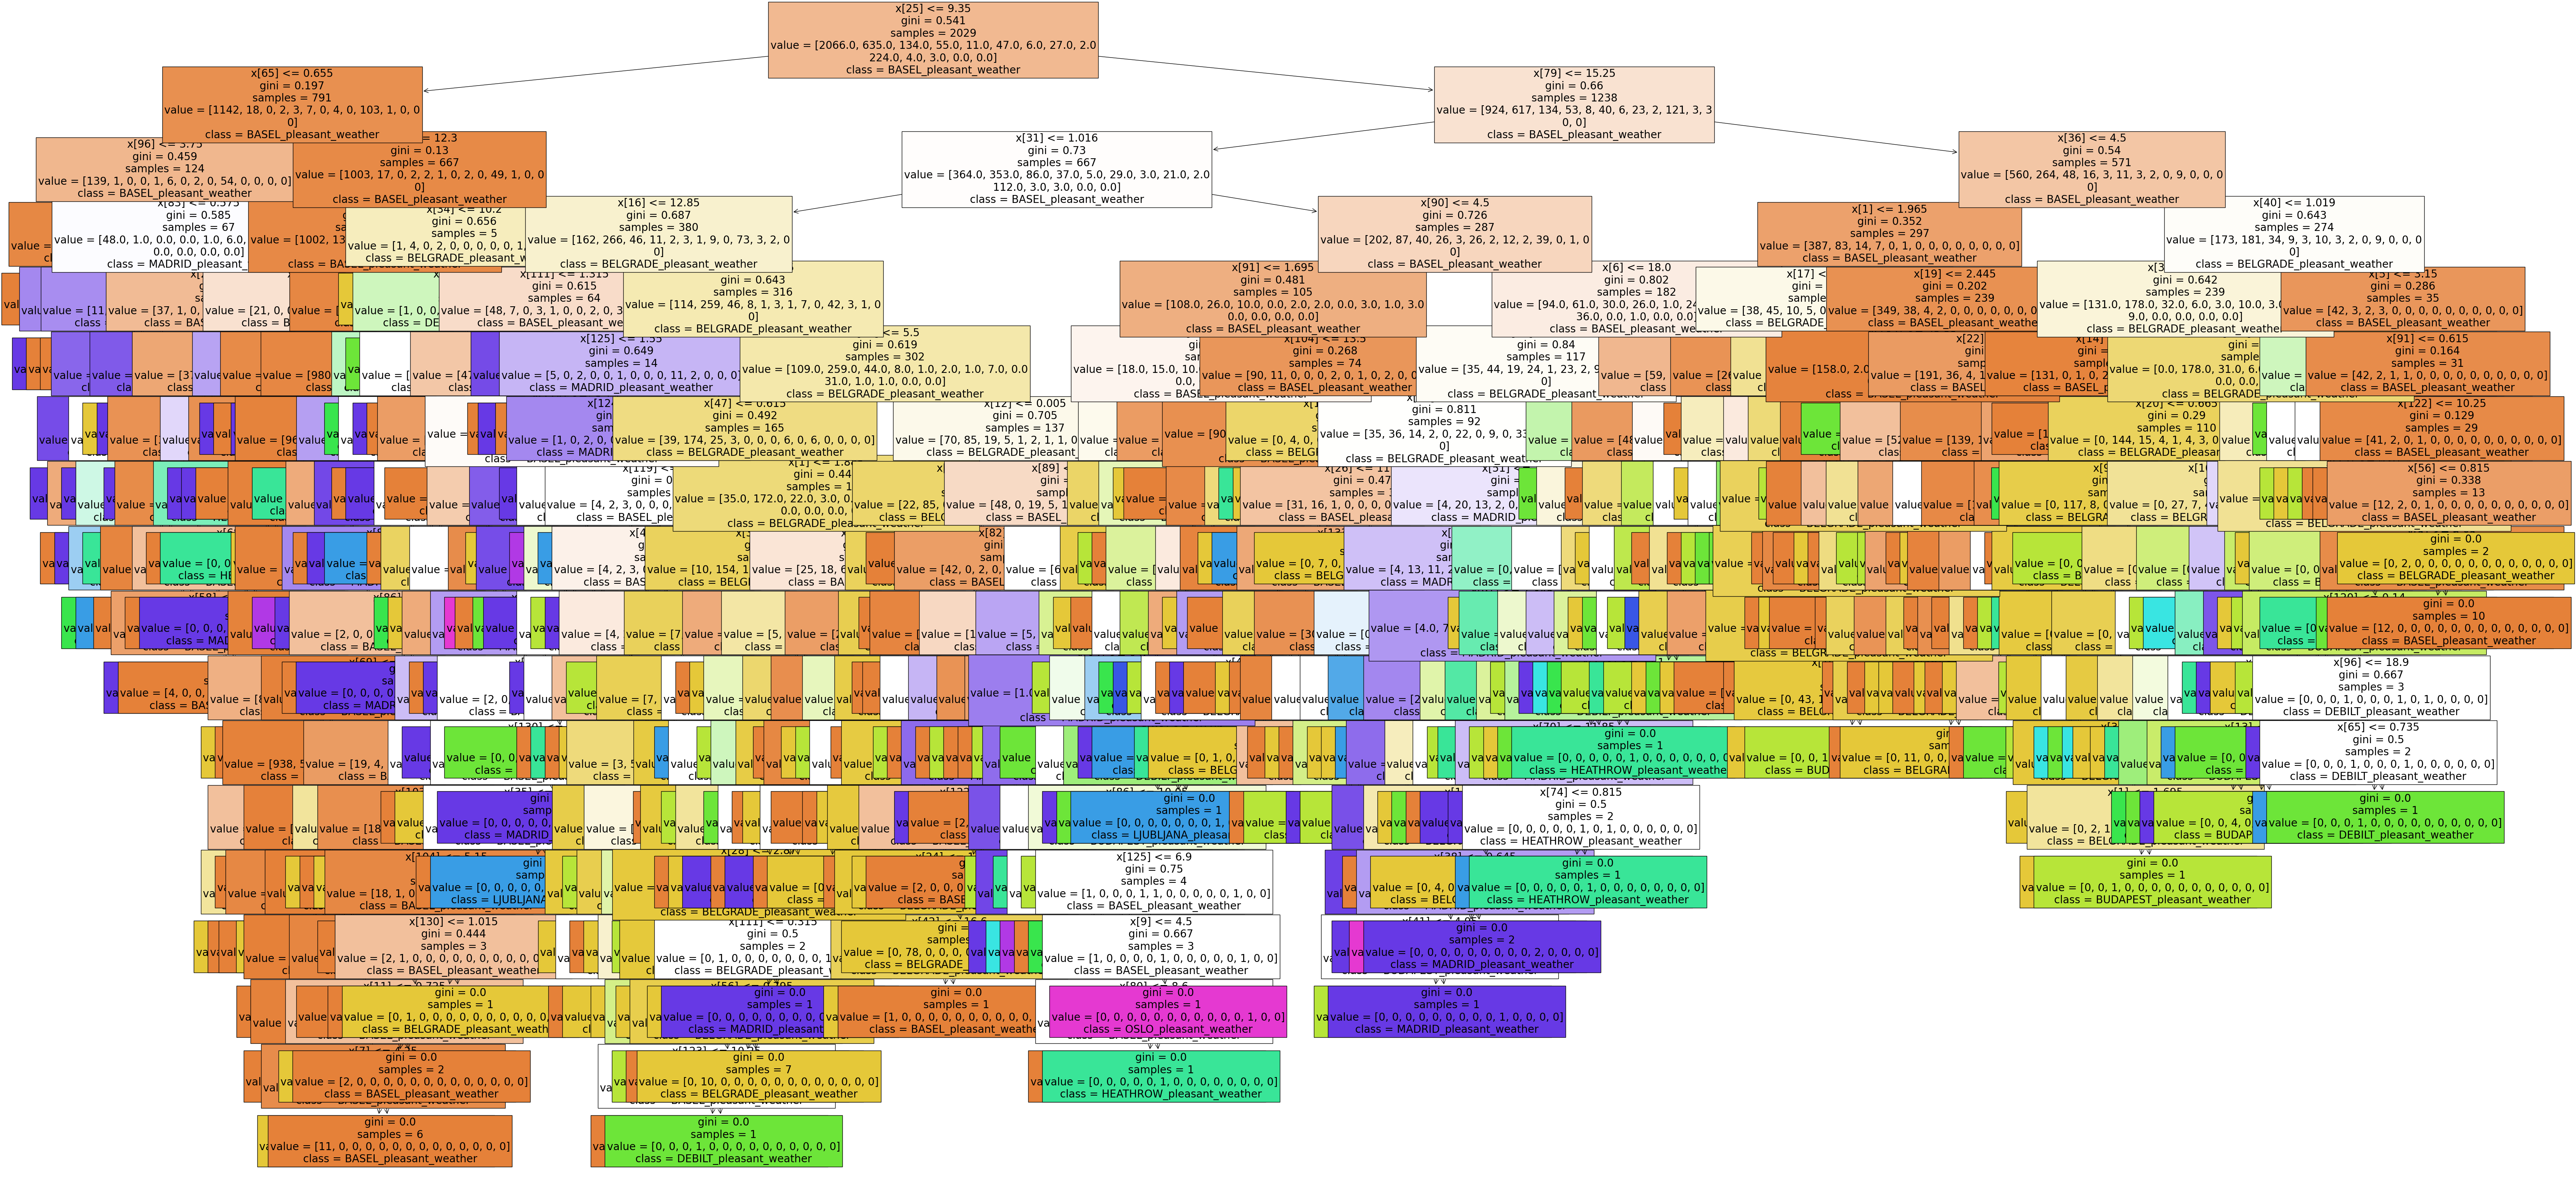

In [37]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=weather_outcomes, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

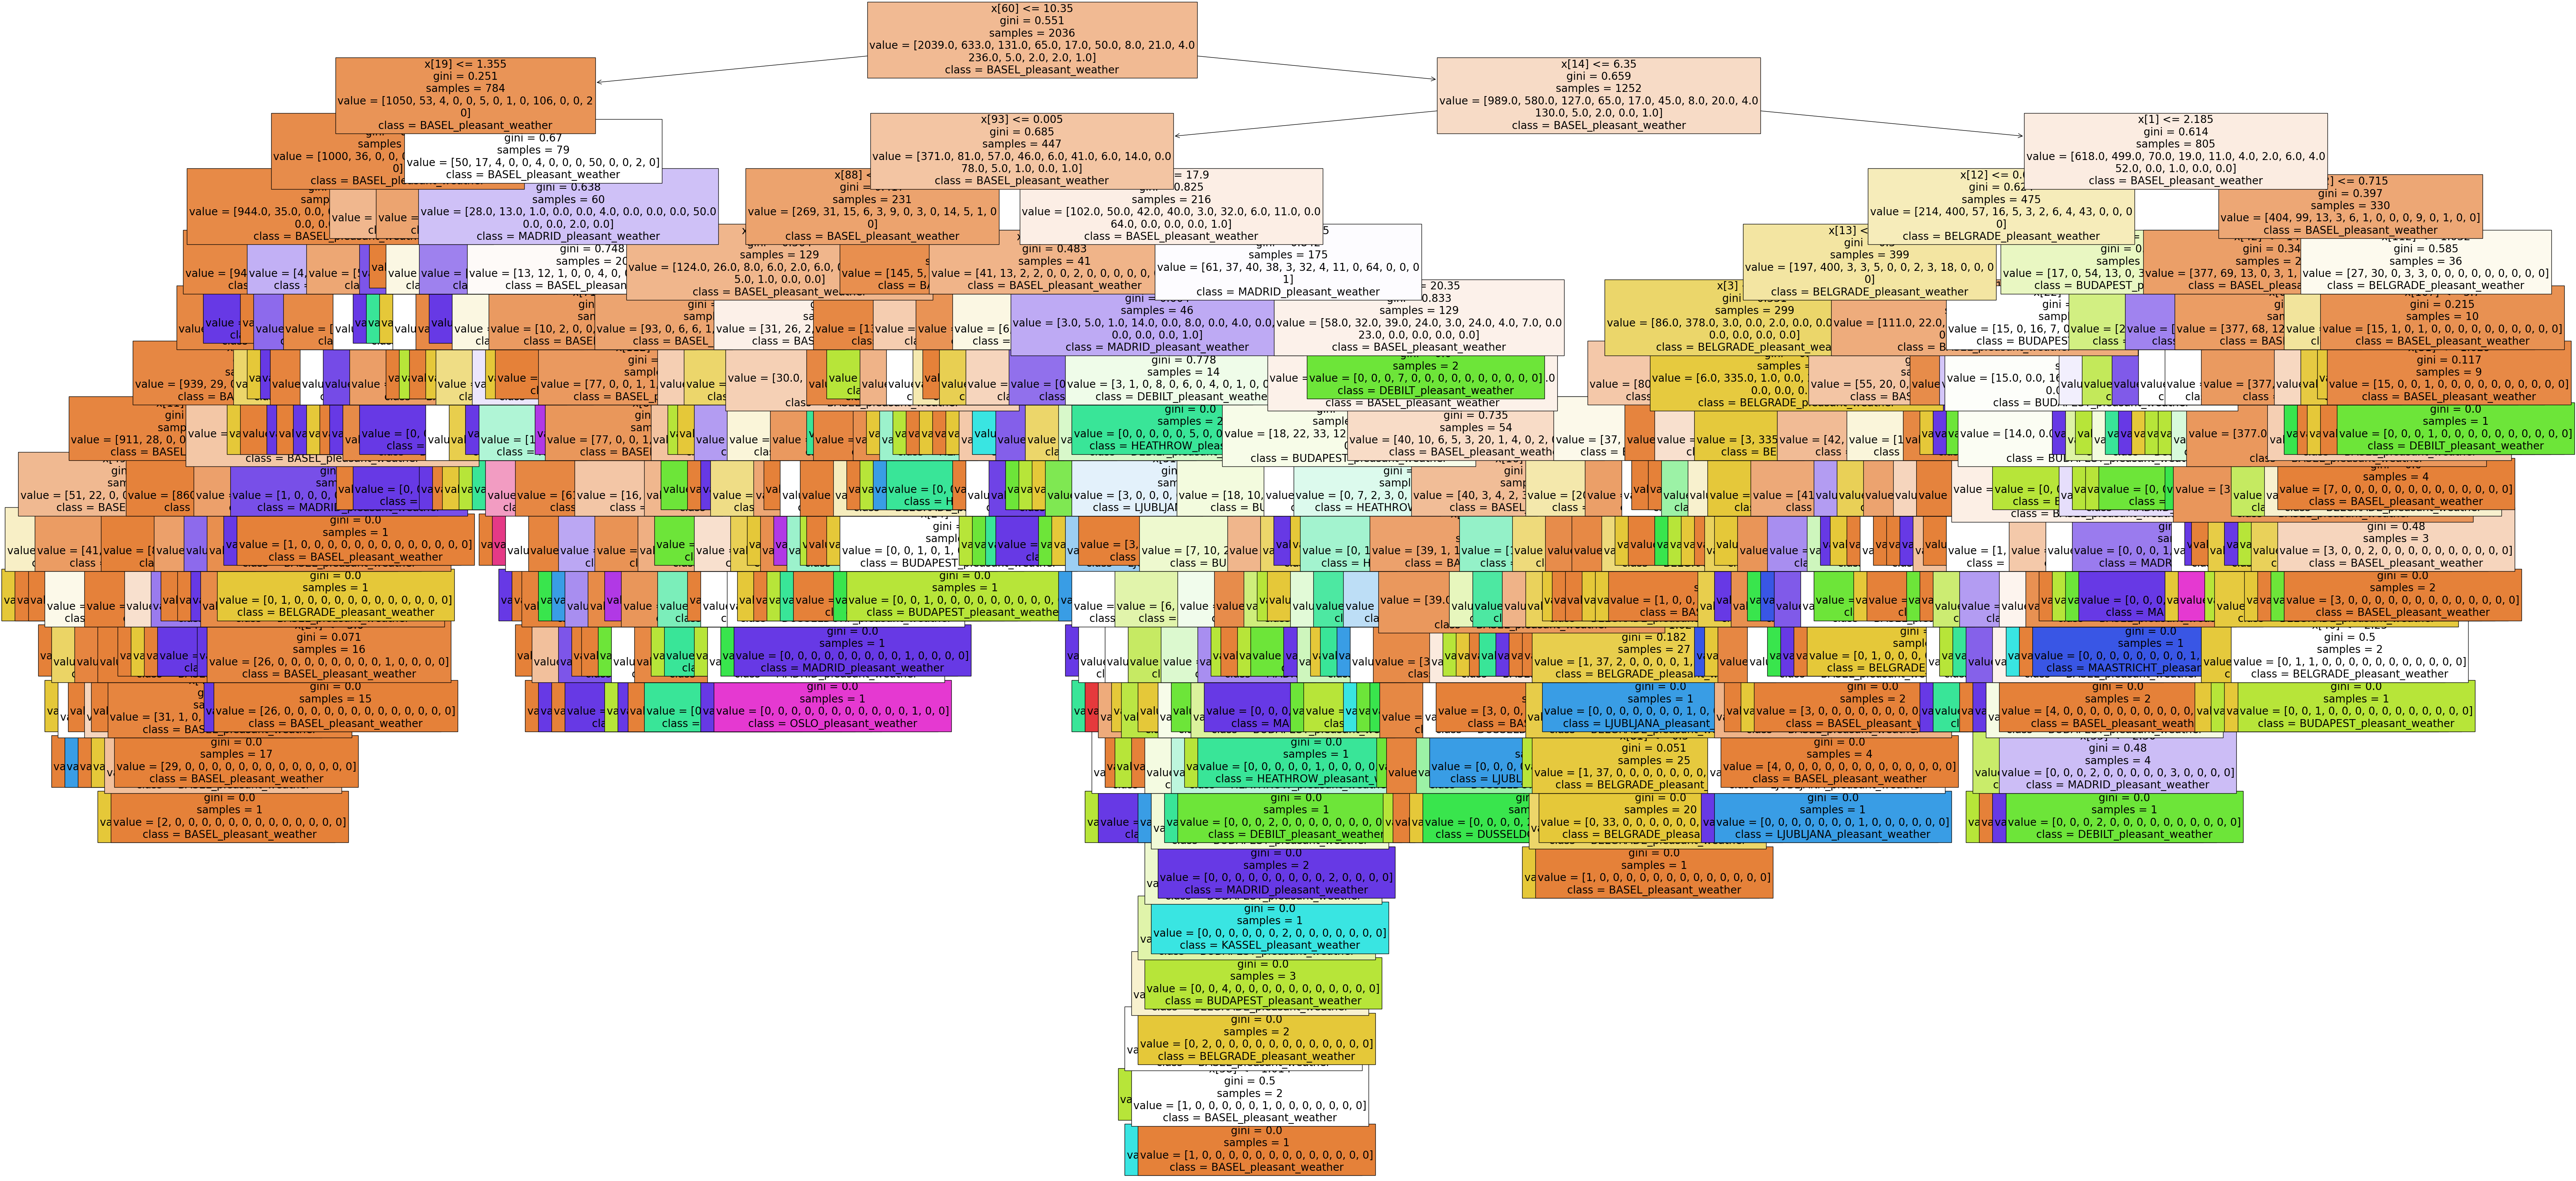

In [38]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=weather_outcomes, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 6. Conduct feature importances analysis

In [39]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.0136318 , 0.01632413, 0.01169834, 0.08720789, 0.00493583,
       0.02530576, 0.0228    , 0.01204325, 0.00363251, 0.00957639,
       0.00944159, 0.00998273, 0.04218503, 0.00578255, 0.01051279,
       0.02773111, 0.023388  , 0.00685552, 0.00369069, 0.0073498 ,
       0.00512866, 0.00747942, 0.00525907, 0.00623774, 0.01308492,
       0.0179041 , 0.0065081 , 0.00225352, 0.00461893, 0.00293533,
       0.00343869, 0.00614108, 0.00329032, 0.00730761, 0.0062578 ,
       0.00329731, 0.00212405, 0.00433619, 0.0031335 , 0.00394437,
       0.00702424, 0.00347697, 0.00988204, 0.00544853, 0.00310485,
       0.00159838, 0.00497104, 0.00410117, 0.00187028, 0.00400676,
       0.00354701, 0.00801978, 0.00598278, 0.00371046, 0.00222475,
       0.00415457, 0.00318873, 0.00344081, 0.00709732, 0.00301282,
       0.01141705, 0.00587127, 0.00283032, 0.00237763, 0.00509354,
       0.00447203, 0.0035261 , 0.00552658, 0.00378736, 0.01608863,
       0.02085699, 0.00553912, 0.00294146, 0.004498  , 0.00296

In [40]:
np.set_printoptions(threshold=1000)

In [41]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.0136318 , 0.01632413, 0.01169834, 0.08720789, 0.00493583,
         0.02530576, 0.0228    , 0.01204325, 0.00363251],
        [0.00957639, 0.00944159, 0.00998273, 0.04218503, 0.00578255,
         0.01051279, 0.02773111, 0.023388  , 0.00685552],
        [0.00369069, 0.0073498 , 0.00512866, 0.00747942, 0.00525907,
         0.00623774, 0.01308492, 0.0179041 , 0.0065081 ],
        [0.00225352, 0.00461893, 0.00293533, 0.00343869, 0.00614108,
         0.00329032, 0.00730761, 0.0062578 , 0.00329731],
        [0.00212405, 0.00433619, 0.0031335 , 0.00394437, 0.00702424,
         0.00347697, 0.00988204, 0.00544853, 0.00310485],
        [0.00159838, 0.00497104, 0.00410117, 0.00187028, 0.00400676,
         0.00354701, 0.00801978, 0.00598278, 0.00371046],
        [0.00222475, 0.00415457, 0.00318873, 0.00344081, 0.00709732,
         0.00301282, 0.01141705, 0.00587127, 0.00283032],
        [0.00237763, 0.00509354, 0.00447203, 0.0035261 , 0.00552658,
         0.00378736, 0.01608863, 0.0208569

In [42]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.19757951, 0.14545572, 0.07264251, 0.03954061, 0.04247474,
       0.03780767, 0.04323763, 0.06726797, 0.04754698, 0.10634677,
       0.0698328 , 0.02982215, 0.03735955, 0.03198078, 0.03110459])

In [43]:
important = pd.Series(sumarray, index = weather) #.sort_values(ascending = False)
important

BASEL_         0.197580
BELGRADE_      0.145456
BUDAPEST_      0.072643
DEBILT_        0.039541
DUSSELDORF_    0.042475
HEATHROW_      0.037808
KASSEL_        0.043238
LJUBLJANA_     0.067268
MAASTRICHT_    0.047547
MADRID_        0.106347
MUNCHENB_      0.069833
OSLO_          0.029822
SONNBLICK_     0.037360
STOCKHOLM_     0.031981
VALENTIA_      0.031105
dtype: float64

['BASEL_', 'BELGRADE_', 'BUDAPEST_', 'DEBILT_', 'DUSSELDORF_', 'HEATHROW_', 'KASSEL_', 'LJUBLJANA_', 'MAASTRICHT_', 'MADRID_', 'MUNCHENB_', 'OSLO_', 'SONNBLICK_', 'STOCKHOLM_', 'VALENTIA_']


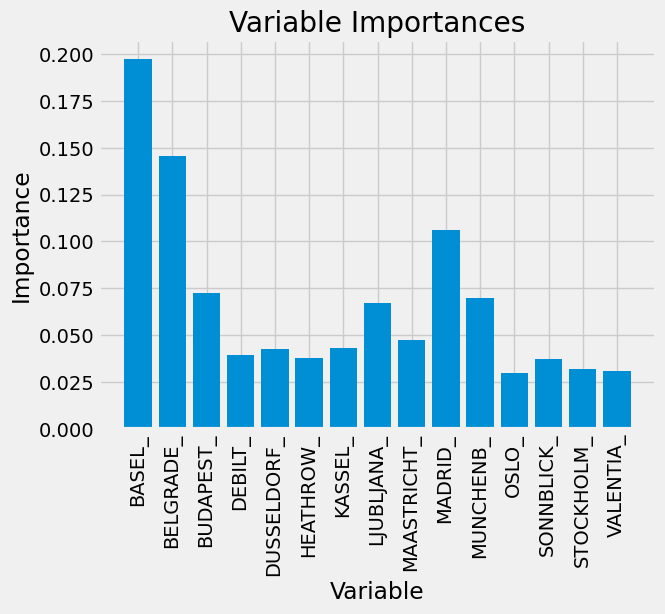

In [44]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

- **Notes:** Basel, Belgrade, and Madrid weather stations hold the most variable importance (weight) in our random tree prediction model, with an accuracy of 88%.

            - It's recommended to explore these features more in depth, specifically, we want to query which of the
            9 observations for these top 3/15 weather stations will have the most importance in pleasant weather day
            predictions?

---------------------------------------------------------------------------------------------------------------------------